1. What is Logistic Regression, and how does it differ from Linear 
Regression? 

Ans- Logistic Regression is a statistical and machine learning method used to predict a categorical (discrete) target variable.  
It models the log-odds of the probability using a linear combination of input features:  

\[
z = (w_1)(x_1) + (w_2)(x_2) + ..... + (w_n)(x_n) + c
\]

The predicted probability is obtained using the sigmoid function:  

\[
y_{pred}} = 1/(1 + e^-z)
\]

**Key Difference:**
- **Linear Regression** → Predicts continuous values.  
- **Logistic Regression** → Predicts probability of a discrete class (e.g., 0 or 1).  


2. Explain the role of the Sigmoid function in Logistic Regression. 

Ans- The purpose of sigmoid function is to convert this output of Linear equation  

\[
z = (w_1)(x_1) + (w_2)(x_2) + .... + (w_n)(x_n) + c
\]  

to a value in range of 0 to 1:  

\[
f(x) = 1/(1 + e^-z)
\]


3. What is Regularization in Logistic Regression and why is it needed?  

Ans- Regularization in Logistic Regression is the process of adding a penalty term to the 
loss function to prevent the model from overfitting and to handle multicollinearity. It 
works by discouraging the model from assigning very large weights to features.

4. What are some common evaluation metrics for classification models, and 
why are they important?

Ans. Evaluation metrics measure how well a classification model performs. They are important 
because accuracy alone may be misleading, especially with imbalanced datasets. Common 
metrics include: 
1. Accuracy- This is ratio of correctly predicted observation and total observation. Good 
for balanced datasets. 
2. Precision- This is ration of all predicted positive observation to actual positive 
observation 𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛= 𝑇𝑃 / (𝑇𝑃+𝐹𝑃)
 , It is used when predicting FP cost is higher. 
3. Recall- ratio of all actual positive to correctly predicted positive. 𝑅𝑒𝑐𝑎𝑙𝑙= 𝑇𝑃 / (𝑇𝑃+𝐹𝑁)
 . 
This is good when missing a positive case is costly. 
4. F1-Score - Harmonic mean of Precision and Recall. Balances both metrics.

Importance: They help in selecting the right model, comparing performance, and ensuring the 
model meets business or real-world requirements, especially when class distributions are 
uneven. 

5.  Write a Python program that loads a CSV file into a Pandas DataFrame, 
splits into train/test sets, trains a Logistic Regression model, and prints its accuracy. 
(Use Dataset from sklearn package)  
(Include your Python code and output in the code box below.) 

Accuracy Score: 0.9473684210526315
Precision Score: 0.9459459459459459
Recall Score: 0.9722222222222222
Confustion Matrix: 
 [[38  4]
 [ 2 70]]


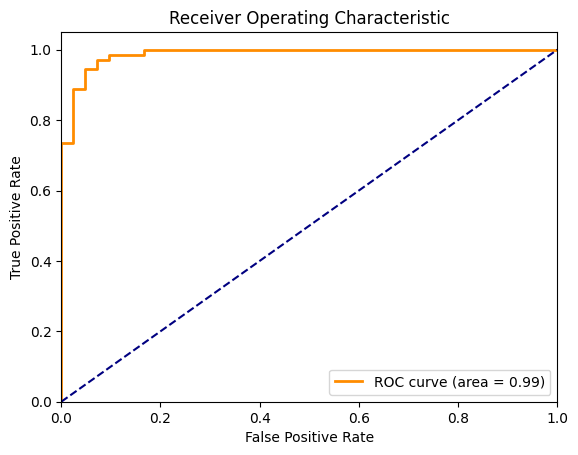

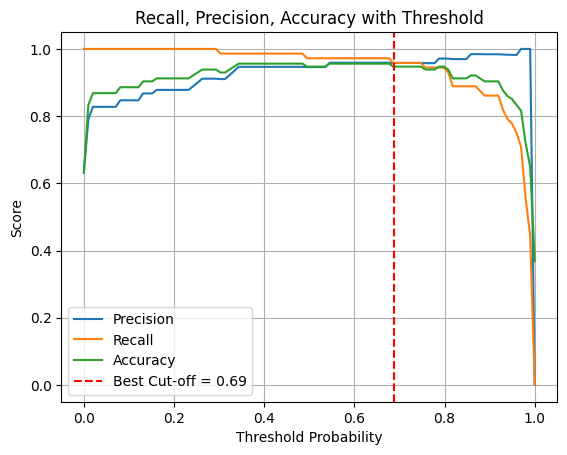

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc 
from sklearn.datasets import load_breast_cancer 
 
data = load_breast_cancer() 
x, y = data.data, data.target 
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
 
classifier = LogisticRegression() 
 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}') 
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}') 
print(f'Confustion Matrix: \n {confusion_matrix(y_test, y_pred)}') 
 
y_pred_proba = classifier.predict_proba(X_test)[:, -1] 
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, color='darkorange', 
         linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random guess line 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 
plt.show() 
 
thresholds_list = np.linspace(0, 1, 100) 
precisions = [] 
recalls = [] 
accuracies = [] 
 
for t in thresholds_list: 
    y_pred_threshold = (y_pred_proba >= t).astype(int) 
    precision = precision_score(y_test, y_pred_threshold) 
    recall = recall_score(y_test, y_pred_threshold) 
    accuracy = accuracy_score(y_test, y_pred_threshold) 
    precisions.append(precision) 
    recalls.append(recall) 
    accuracies.append(accuracy) 
 
precision_vals = np.array(precisions) 
recall_vals = np.array(recalls) 
accuracy_vals = np.array(accuracies) 
 
diffs = np.abs(precision_vals - recall_vals) + np.abs(precision_vals - accuracy_vals) + np.abs(recall_vals - accuracy_vals) 
 
best_index = np.argmin(diffs)
best_threshold = thresholds_list[best_index] 
 
plt.plot(thresholds_list, precisions, label='Precision') 
plt.plot(thresholds_list, recalls, label='Recall') 
plt.plot(thresholds_list, accuracies, label='Accuracy') 
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Cut-off = {best_threshold:.2f}') 
plt.xlabel('Threshold Probability') 
plt.ylabel('Score') 
plt.title('Recall, Precision, Accuracy with Threshold') 
plt.legend() 
plt.grid(True) 
plt.show() 

6. Write a Python program to train a Logistic Regression model using L2 
regularization (Ridge) and print the model coefficients and accuracy.  
(Use Dataset from sklearn package)  
(Include your Python code and output in the code box below.) 

Coefficients are ...
mean radius: 1.1105532140578636 
mean texture: 0.40625667210116484 
mean perimeter: 0.11895654222562699 
mean area: -0.006581839379172107 
mean smoothness: -0.0359760055335497 
mean compactness: -0.19423840463903316 
mean concavity: -0.2789396955330614 
mean concave points: -0.11410516648023336 
mean symmetry: -0.05436627540223779 
mean fractal dimension: -0.00916465368595279 
radius error: 0.06636636153150285 
texture error: 0.2571062738959016 
perimeter error: 0.23086421713666097 
area error: -0.07605364211203114 
smoothness error: -0.004241516555988593 
compactness error: -0.04480932925980422 
concavity error: -0.06733419879944567 
concave points error: -0.016840316325881257 
symmetry error: -0.01706669137075827 
fractal dimension error: -0.004089629633238081 
worst radius: 1.2809410129393088 
worst texture: -0.43329661901702804 
worst perimeter: -0.21155711987011716 
worst area: -0.018482524740202216 
worst smoothness: -0.06183420202043603 
worst compactness: -

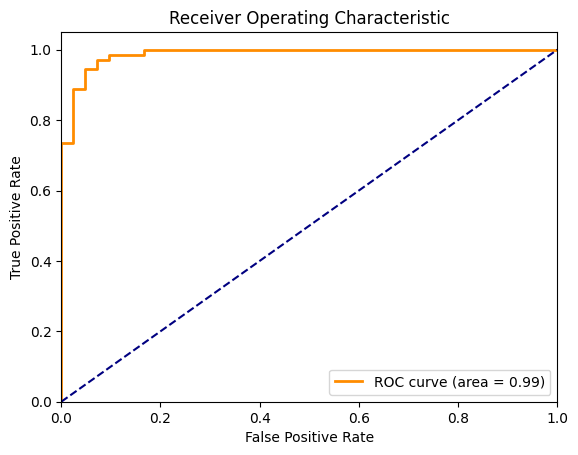

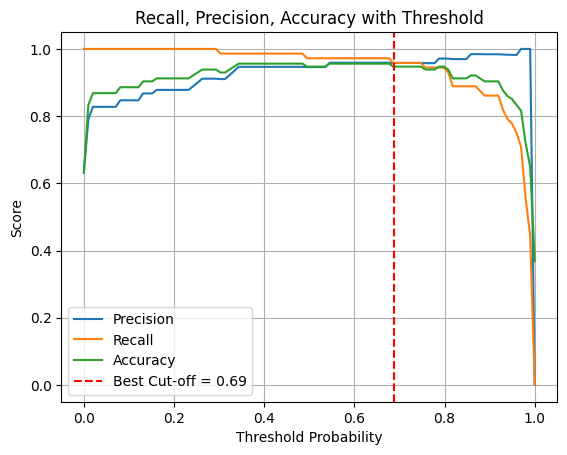

In [6]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc 
from sklearn.datasets import load_breast_cancer 
 
data = load_breast_cancer() 
x, y = data.data, data.target 
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
 
classifier = LogisticRegression(penalty='l2')

classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
coef = classifier.coef_

features = data.feature_names 
print('Coefficients are ...')
for i in range(len(features)): 
    print(f"{features[i]}: {coef[0][i]} ") 
print(f'\nAccuracy Score: {accuracy_score(y_test, y_pred)}') 
print(f'Precision Score: {precision_score(y_test, y_pred)}') 
print(f'Recall Score: {recall_score(y_test, y_pred)}') 
print(f'Confustion Matrix: \n {confusion_matrix(y_test, y_pred)}') 
 
y_pred_proba = classifier.predict_proba(X_test)[:, -1] 
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, color='darkorange', 
         linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random guess line 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 
plt.show() 
 
thresholds_list = np.linspace(0, 1, 100) 
precisions = [] 
recalls = [] 
accuracies = [] 
 
for t in thresholds_list: 
    y_pred_threshold = (y_pred_proba >= t).astype(int) 
    precision = precision_score(y_test, y_pred_threshold) 
    recall = recall_score(y_test, y_pred_threshold) 
    accuracy = accuracy_score(y_test, y_pred_threshold) 
    precisions.append(precision) 
    recalls.append(recall) 
    accuracies.append(accuracy) 

precision_vals = np.array(precisions) 
recall_vals = np.array(recalls) 
accuracy_vals = np.array(accuracies) 
 
diffs = np.abs(precision_vals - recall_vals) + np.abs(precision_vals - accuracy_vals) + np.abs(recall_vals - accuracy_vals) 
 
best_index = np.argmin(diffs) 
best_threshold = thresholds_list[best_index] 
 
plt.plot(thresholds_list, precisions, label='Precision') 
plt.plot(thresholds_list, recalls, label='Recall') 
plt.plot(thresholds_list, accuracies, label='Accuracy') 
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Cut-off = {best_threshold:.2f}') 
plt.xlabel('Threshold Probability') 
plt.ylabel('Score') 
plt.title('Recall, Precision, Accuracy with Threshold') 
plt.legend() 
plt.grid(True) 
plt.show() 

7. Write a Python program to train a Logistic Regression model for multiclass 
classification using multi_class='ovr' and print the classification report. (Use 
Dataset from sklearn package)  
(Include your Python code and output in the code box below.) 

In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.datasets import load_iris 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
 
data = load_iris() 
 
X, y = data.data, data.target 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
 
classifier_OvR = LogisticRegression(multi_class='ovr', solver='lbfgs') 
 
classifier_OvR.fit(X_train, y_train) 
 
y_pred_OvR = classifier_OvR.predict(X_test) 
 
print(classification_report(y_test, y_pred_OvR)) 
print(confusion_matrix(y_test, y_pred_OvR)) 
print(accuracy_score(y_test, y_pred_OvR)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.69      0.82        13
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30

[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
0.8666666666666667


8. Write a Python program to apply GridSearchCV to tune C and penalty 
hyperparameters for Logistic Regression and print the best parameters and validation 
accuracy.  
(Use Dataset from sklearn package)  
(Include your Python code and output in the code box below.)

In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
warnings.filterwarnings('ignore') 

data = load_iris() 
 
X, y = data.data, data.target 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
 
param_grid = { 
    'penalty': ["l1", "l2", "elasticnet"],  
    "C": [1, 2, 5, 10, 100] 
} 
 
base_classifier = LogisticRegression(max_iter=1000) 
 
grid_model = GridSearchCV(estimator=base_classifier, param_grid=param_grid, verbose=5) 
grid_model.fit(X_train, y_train) 
 
print("Best parameters are ...") 
print(grid_model.best_params_) 
 
print('Predicting for the test data') 
y_pred_grid = grid_model.best_estimator_.predict(X_test) 
print('Stats for the test data after prediction....') 
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_grid)}") 
print(f"Classification Report: \n {classification_report(y_test, y_pred_grid)}") 
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_grid)}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.958 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.958 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=1.000 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.958 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.958 total time=   0.0s
[CV 1/5] END .............C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=1, penalty=elasticne

9. Write a Python program to standardize the features before training Logistic 
Regression and compare the model's accuracy with and without scaling.  
(Use Dataset from sklearn package)  
(Include your Python code and output in the code box below.) 

In [9]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
 
data = load_breast_cancer() 
X = data.data 
y = data.target 
 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=42 
) 
 
model_no_scaling = LogisticRegression(max_iter=10000) 
model_no_scaling.fit(X_train, y_train) 
y_pred_no_scaling = model_no_scaling.predict(X_test) 
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling) 
 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
 
model_scaling = LogisticRegression(max_iter=10000) 
model_scaling.fit(X_train_scaled, y_train) 
y_pred_scaling = model_scaling.predict(X_test_scaled) 
acc_scaling = accuracy_score(y_test, y_pred_scaling) 
 
print("Accuracy without scaling: {:.4f}".format(acc_no_scaling)) 
print("Accuracy with scaling:    {:.4f}".format(acc_scaling)) 

Accuracy without scaling: 0.9561
Accuracy with scaling:    0.9737


10.  Imagine you are working at an e-commerce company that wants to 
predict which customers will respond to a marketing campaign. Given an imbalanced 
dataset (only 5% of customers respond), describe the approach you’d take to build a 
Logistic Regression model — including data handling, feature scaling, balancing 
classes, hyperparameter tuning, and evaluating the model for this real-world business 
use case. 

Ans- 
1. Understanding Data and Problem- here we will define what to achieve why to 
achieve. 
• Goal- We want to find out the persons who are willing to respond or not. 
• Why Goal: to incur less cost as direct targeting interested customers. 
• Problem: only 5% cases are 1(responding). 
2. Data handling-  
• We will first check an duplicate values are present or not. 
• After that we remove irrelevant features/columns like name, and etc. 
• then we will remove all the null value or replace it with mean or median if 
logically possible/suitable for the data. 
• Then we will split data in train and test. 
3. Feature Scaling- We will scale the data using standard scaler and LabelEncoder 
or OneHotEncoder. 
4. Model Building- After Data handing and scaling we will make the model with 
hyperparameter tuning using sklearn.model_selection.randomsearchcv and 
sklear.linear_model.logisticsmodel for the estimator in the model para_dist 
parameter will be param_dist = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': uniform(0.01, 
100), 'solver': ['liblinear', 'saga'], 'l1_ratio': np.linspace(0, 1, 10)} will be training the 
model with various parameter and l1 ratio to get best model  
5. Model Evaluation- Because the dataset is imbalanced, accuracy is misleading. 
Instead, evaluate using: 
• Precision, Recall, F1-score → Especially important in marketing. 
• ROC-AUC → How well the model ranks positives higher than negatives. 
• PR-AUC → More informative when positives are rare. 
• Confusion Matrix → Check trade-offs at chosen threshold. 
• Precision → E.g., top 5% of customers with highest predicted probability.